In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score

import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import ensemble

from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



% matplotlib inline

/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_pickle('finalized_data.pickle')

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(12,10))
df.corr()['Award_amt'].sort_values(ascending=False).plot(kind='bar');

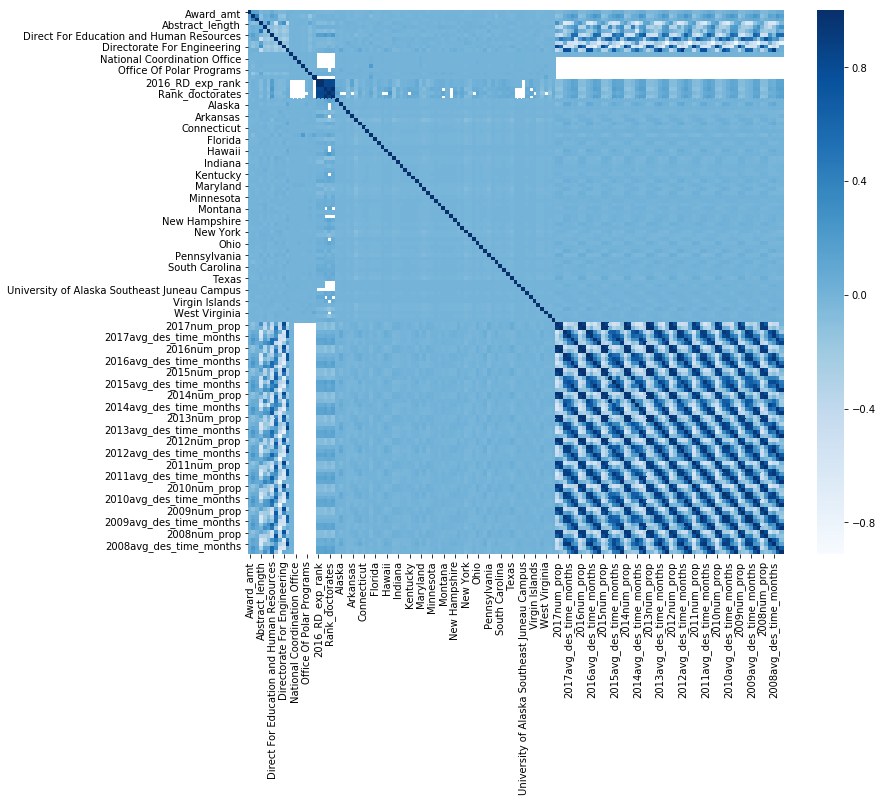

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="Blues");

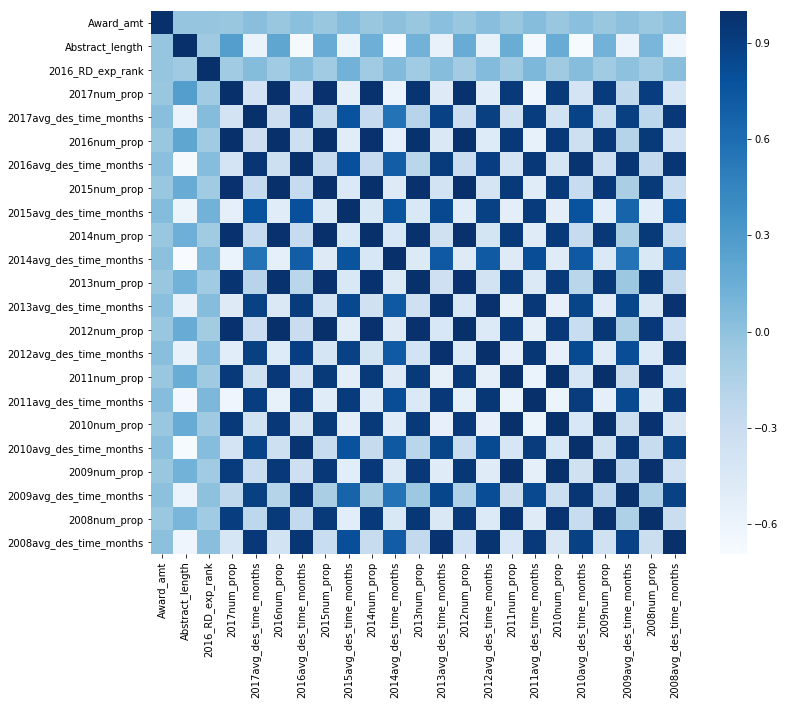

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['Award_amt','Abstract_length','2016_RD_exp_rank', '2017num_prop','2017avg_des_time_months',
                '2016num_prop',
    '2016avg_des_time_months', '2015num_prop', '2015avg_des_time_months', '2014num_prop', '2014avg_des_time_months',
    '2013num_prop','2013avg_des_time_months', '2012num_prop', '2012avg_des_time_months', '2011num_prop',
    '2011avg_des_time_months', '2010num_prop', '2010avg_des_time_months', '2009num_prop', '2009avg_des_time_months',
    '2008num_prop', '2008avg_des_time_months']].corr(), cmap="Blues");

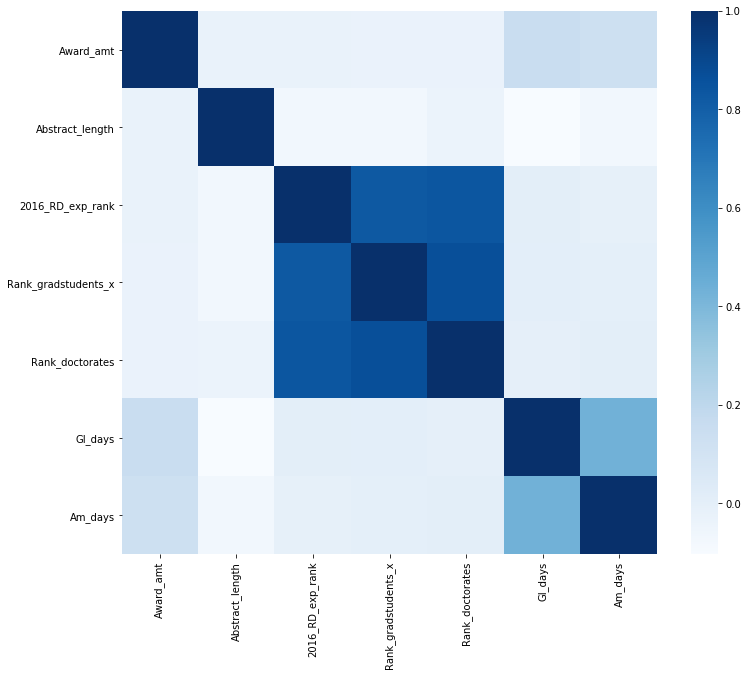

In [82]:
plt.figure(figsize=(12,10));
corrheatmap=sns.heatmap(df[['Award_amt','Abstract_length','2016_RD_exp_rank', 'Rank_gradstudents_x', 
                            'Rank_doctorates', 'Gl_days','Am_days', 'State', 'Institution_x',
                            'Directorate']].corr(), cmap="Blues")
plt.savefig('corrheatmap.png')

In [4]:
X= df[['Gl_days', 'Am_days',
       'Abstract_length','Direct For Biological Sciences',
       'Direct For Computer & Info Scie & Enginr',
       'Direct For Education and Human Resources',
       'Direct For Mathematical & Physical Scien',
       'Direct For Social, Behav & Economic Scie',
       'Directorate For Engineering', 'Directorate For Geosciences',
       'Directorate for Geosciences',
          '2016_RD_exp_rank', '2016_RD_perc',
       'Rank_gradstudents_x', 'Rank_doctorates','Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas',
      'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']].fillna('0')


#X=df['Gl_days']

In [ ]:
X.shape

In [5]:
y=df['Award_amt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print((X_train).shape)
print((X_test).shape)
print((y_train).shape)
print((y_test).shape)

In [ ]:
y.shape

In [6]:
lr = LinearRegression()
# Fit the model against the training data
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)


In [7]:
y_pred = lr.predict(X_test)

In [8]:
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.06258410587934748

In [ ]:
lr.coef_, lr.intercept_

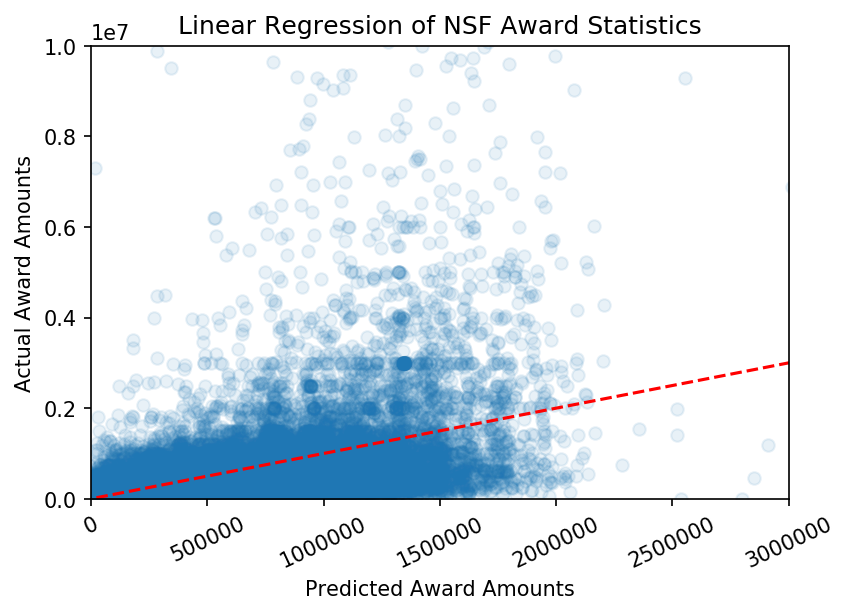

In [9]:

plt.figure(dpi=150)
plt.scatter(y_pred,y,alpha=0.1);
plt.xlim(0,0.3*1e7)
plt.xlabel("Predicted Award Amounts");
plt.ylabel("Actual Award Amounts");
plt.plot([min(y),max(y)],[min(y),max(y)],'r--')
plt.title("Linear Regression of NSF Award Statistics");
plt.xticks(rotation=25);
plt.ylim(0,10000000)
plt.savefig('Modelperf.png')

In [15]:
residuals =[y-y_pred]

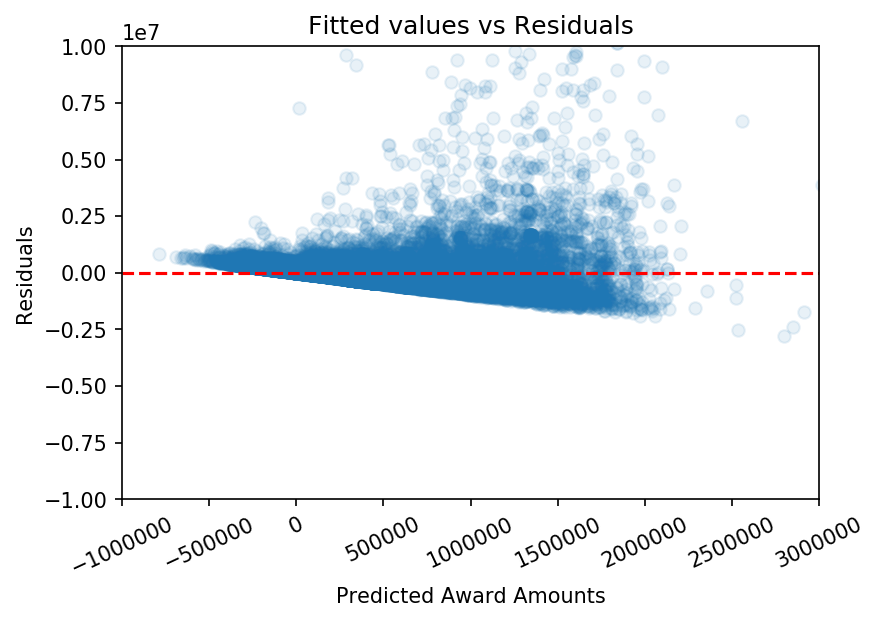

In [18]:
plt.figure(dpi=150)
plt.scatter(y_pred,residuals,alpha=0.1);
#plt.xlim(0,0.3*1e7)
plt.xlabel("Predicted Award Amounts");
plt.ylabel("Residuals");
plt.axhline(y=0,color='r', linestyle='--')
plt.title("Fitted values vs Residuals");
plt.xticks(rotation=25);
plt.ylim(-10000000,10000000)
plt.xlim(-1000000,3000000)
plt.savefig('residuals.png')

In [10]:
#mse = metrics.mean_squared_error(y_test, y_pred)
#print(mse)

print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Training set R2 Score:", metrics.r2_score(y_train, y_pred_train))

Training set RMSE: 2092151.7436626635
Training set R2 Score: 0.037538052141272704


In [13]:

print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Test set R2 Score:", metrics.r2_score(y_test, y_pred))

Test set RMSE: 1307074.3788092614
Test set R2 Score: 0.06258410587934748


### Lasso Regularization

In [19]:
ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)

In [57]:
model = Lasso()
parameters = {'alpha': [10000,100000,1000000], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [10000, 100000, 1000000], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [58]:
grid.cv_results_

/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anacon

{'mean_fit_time': array([0.09649682, 0.08403645, 0.06051712, 0.05289917, 0.05237336,
        0.04614353]),
 'std_fit_time': array([0.00926567, 0.00131548, 0.00276368, 0.00061095, 0.00034543,
        0.0005122 ]),
 'mean_score_time': array([0.00105867, 0.00106463, 0.00107255, 0.0010334 , 0.00101767,
        0.00093617]),
 'std_score_time': array([1.10566600e-05, 1.93137298e-05, 2.50299087e-05, 1.06192395e-05,
        1.40788947e-05, 1.22711242e-05]),
 'param_alpha': masked_array(data=[10000, 10000, 100000, 100000, 1000000, 1000000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, False, True, False, True, False],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 10000, 'fit_intercept': True},
  {'alpha': 10000, 'fit_intercept': False},
  {'alpha': 100000, 'fit_intercept': True},
  {'alph

In [59]:
def print_test_scores(grid):
    for ix in range(5):
        key = "split{}_test_score".format(ix)
        print(key,grid.cv_results_[key])
        
print_test_scores(grid)

split0_test_score [-304486.3092436  -453690.80905862 -290676.27806391 -417124.3209885
 -330546.04335841 -395381.11948284]
split1_test_score [-330204.83206268 -478525.76311406 -328338.29670274 -451256.14193162
 -369646.09536075 -441686.45624791]
split2_test_score [-303567.42576853 -446860.06681948 -286370.0473098  -410777.9224194
 -323175.19477635 -391067.30453684]
split3_test_score [-308786.58435679 -453452.10024893 -293312.88549674 -422014.38749408
 -333216.64638732 -406258.76825326]
split4_test_score [-323410.102161   -468336.90510345 -309248.5425037  -435270.44356671
 -348597.2670878  -418559.22985174]


In [60]:
type(grid.best_estimator_)

sklearn.linear_model.coordinate_descent.Lasso

In [61]:
X_test_scaled = ssX.transform(X_test)
best_lasso = grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)
for true,pred in zip(y_test[:20], lasso_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 374679.0550112949, $-111359.0550112949
pred, resid: 990796.3150074745, $10059203.684992526
pred, resid: 440161.39914376574, $-126824.39914376574
pred, resid: 191650.66799038273, $33349.33200961727
pred, resid: 118156.39825624158, $-106816.39825624158
pred, resid: 163886.69104383598, $16112.308956164023
pred, resid: 742719.9111513775, $-598470.9111513775
pred, resid: 379687.8656034438, $-36547.86560344382
pred, resid: 379687.8656034438, $-79687.86560344382
pred, resid: 531335.0102897309, $-345645.01028973085
pred, resid: 379330.0934182903, $27027.906581709685
pred, resid: 379330.0934182903, $70669.90658170969
pred, resid: 379687.8656034438, $-89494.86560344382
pred, resid: 244092.20743027056, $-204092.20743027056
pred, resid: 113147.58766409266, $-88147.58766409266
pred, resid: 118156.39825624158, $-69908.39825624158
pred, resid: 183986.48032448403, $-133986.48032448403
pred, resid: 118156.39825624158, $-103156.39825624158
pred, resid: 374679.0550112949, $-337526.0550112949

In [62]:
print(grid.best_params_, grid.best_score_)

{'alpha': 100000, 'fit_intercept': True} -301588.96672725596


### Ridge Regularization

In [26]:
model = Ridge()
parameters = {'alpha': np.linspace(100, 200, 300)}
grid = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)

In [27]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([100.     , 100.33445, ..., 199.66555, 200.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [28]:
grid.cv_results_

/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sangrador/anacon

{'mean_fit_time': array([0.04251041, 0.03800769, 0.03728805, 0.03717318, 0.0371047 ,
        0.03773971, 0.0371047 , 0.03721471, 0.03879118, 0.03751068,
        0.03821397, 0.03810124, 0.03778706, 0.03886094, 0.04043427,
        0.03850832, 0.03729825, 0.04234858, 0.04079595, 0.03737254,
        0.0372683 , 0.03703189, 0.03714595, 0.0374506 , 0.04089761,
        0.03767514, 0.03759584, 0.0393333 , 0.04021473, 0.03870339,
        0.03730521, 0.03720708, 0.03741374, 0.03707376, 0.03712521,
        0.03699274, 0.0369576 , 0.03704915, 0.03708568, 0.03713489,
        0.03831167, 0.03736687, 0.03810291, 0.03791461, 0.03806257,
        0.039995  , 0.04066644, 0.04205008, 0.04041257, 0.03837566,
        0.03836365, 0.03740759, 0.03821197, 0.03767595, 0.03725905,
        0.03776364, 0.03743687, 0.03828454, 0.03745074, 0.03735948,
        0.03757992, 0.03727388, 0.03719831, 0.03754573, 0.03715639,
        0.03764763, 0.03727217, 0.03714371, 0.03747392, 0.03721232,
        0.03778038, 0.03718133,

In [29]:
print_test_scores(grid)

split0_test_score [-317325.08971692 -317321.90355046 -317318.71950379 -317315.55257097
 -317312.38627293 -317309.21915052 -317306.05122083 -317302.88250075
 -317299.71300696 -317296.54476942 -317293.3769443  -317290.20838317
 -317287.04167041 -317283.87532373 -317280.70826192 -317277.5405006
 -317274.37205524 -317271.2029411  -317268.03317327 -317264.86276664
 -317261.69173596 -317258.52009577 -317255.34786047 -317252.17504426
 -317249.00166121 -317245.8277252  -317242.65324994 -317239.47824901
 -317236.30727438 -317233.13954057 -317229.97128423 -317226.80251858
 -317223.63325673 -317220.46351162 -317217.29329602 -317214.12262258
 -317210.9515038  -317207.77995204 -317204.60797951 -317201.4355983
 -317198.27512417 -317195.11555649 -317191.95562105 -317188.79794389
 -317185.64255215 -317182.48679326 -317179.33067856 -317176.17421921
 -317173.01742627 -317169.86031068 -317166.70288326 -317163.54712265
 -317160.39500741 -317157.24258425 -317154.08986375 -317150.93685633
 -317147.78357231 

In [30]:
type(grid.best_estimator_)

sklearn.linear_model.ridge.Ridge

In [31]:
best_ridge = grid.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)
for true,pred in zip(y_test[:20], ridge_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 330540.1356858265, $-67220.13568582648
pred, resid: 1228621.9031289734, $9821378.096871026
pred, resid: 327058.4331584332, $-13721.433158433181
pred, resid: 63158.26442963962, $161841.73557036038
pred, resid: -80008.36352587177, $91348.36352587177
pred, resid: 58250.62551803043, $121748.37448196957
pred, resid: 760323.1952383837, $-616074.1952383837
pred, resid: 210331.9540507067, $132808.0459492933
pred, resid: 193246.11527368156, $106753.88472631844
pred, resid: 556722.5284545332, $-371032.5284545332
pred, resid: 364750.6712158233, $41607.32878417667
pred, resid: 205679.59569120884, $244320.40430879116
pred, resid: 895095.2015667884, $-604902.2015667884
pred, resid: 86135.81200724677, $-46135.81200724677
pred, resid: 164181.57533671233, $-139181.57533671233
pred, resid: -3334.7940749316476, $51582.79407493165
pred, resid: 39832.66022757045, $10167.33977242955
pred, resid: -22804.734607451595, $37804.734607451595
pred, resid: 92119.49545680458, $-54966.49545680458
pred, r

In [32]:
print(grid.best_params_, grid.best_score_)

{'alpha': 200.0} -326418.4625504185


In [63]:
from sklearn.metrics import mean_squared_error

print("Lasso: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Ridge: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Lasso:  2087662.3134799232
Ridge:  2072740.5718605735


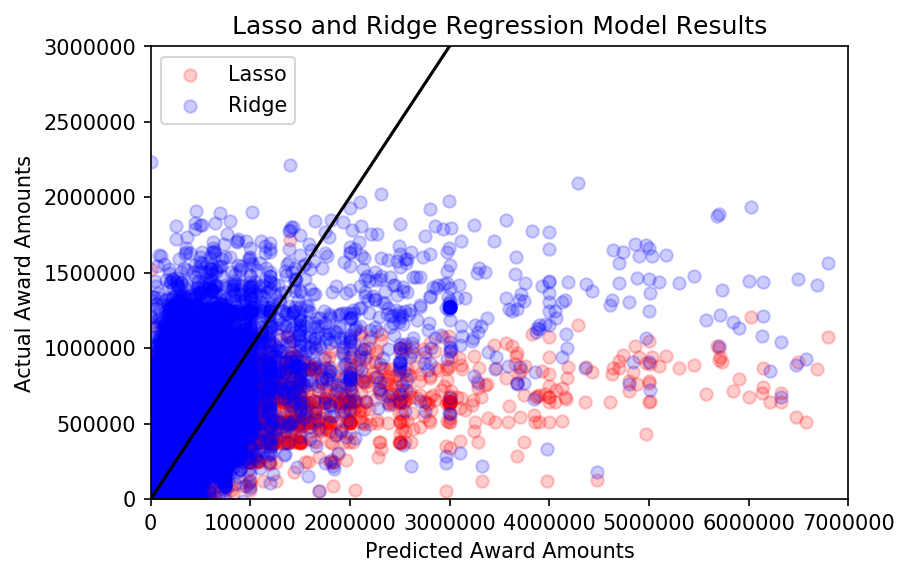

In [71]:
plt.figure(dpi=150)
plt.scatter(y_test, lasso_pred, label="Lasso", c='r', alpha=0.2)
plt.scatter(y_test, ridge_pred, label="Ridge", c='b', alpha=0.2)
plt.xlim(0,0.7*1e7)
plt.ylim(-10,0.3*1e7)
plt.title("Lasso and Ridge Regression Model Results")
plt.xlabel('Predicted Award Amounts')
plt.ylabel('Actual Award Amounts')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'k', zorder=10)
plt.legend(loc="upper left");
plt.savefig('LassoRidgeperf.png')